## PyTorch Intro For Beginners

PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library. Torch is an open source ML library used for creating deep neural networks and is written in the Lua scripting language. It's one of the preferred platforms for deep learning research.

* [PyTorch Basics](#1)
* [Linear Regression](#2)
* [Logistic Regression](#3)
* [Convolutional Neural Networks (CNNs)](#4)
* [Recurrent Neural Networks (RNNs)](#5)
* [Long Short Term Memory (LSTM)](#6)
* [Using GPU on PyTorch](#7)
* [Result](#8)

<a id = "1"></a>
### PyTorch Basics

In [1]:
# pytorch arrays
import torch
array = [[4,3,3],[1,2,5]]
tensor = torch.Tensor(array)
print("Array shape: ",tensor.shape)
print("Array type: ",tensor.type)
print(tensor)

Array shape:  torch.Size([2, 3])
Array type:  <built-in method type of Tensor object at 0x7f545aaf7710>
tensor([[4., 3., 3.],
        [1., 2., 5.]])


In [2]:
# pytorch ones
print(torch.ones((3,4)))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [3]:
# pytorch random
print(torch.rand((3,4)))

tensor([[0.2904, 0.3170, 0.3806, 0.1469],
        [0.6553, 0.5292, 0.6645, 0.1094],
        [0.7173, 0.8629, 0.0109, 0.8611]])


In [4]:
# random numpy array
import numpy as np
array = np.random.rand(2,2)
print("{} \n{}".format(type(array), array))

# from numpy to torch tensor
torch_tensor = torch.from_numpy(array)
print("{}\n".format(torch_tensor))

# tensor to numpy
array = torch_tensor.numpy()
print("{}\n".format(array))

<class 'numpy.ndarray'> 
[[0.43359772 0.44205533]
 [0.6549708  0.27164207]]
tensor([[0.4336, 0.4421],
        [0.6550, 0.2716]], dtype=torch.float64)

[[0.43359772 0.44205533]
 [0.6549708  0.27164207]]



##### Basic Mathematical Operations

In [5]:
# create tensor
tensor = torch.ones((3,3))
print(tensor)

# resize
print(tensor.view(tensor.shape[0] * tensor.shape[1]))

# add
print("Addition: {}\n".format(torch.add(tensor, tensor)))

# subtraction
print("Subtraction: {}\n".format(torch.sub(tensor, tensor)))

# element-wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor, tensor)))

# element-wise division
print("Element wise division: {}\n".format(torch.div(tensor, tensor)))

# Mean
tensor = torch.Tensor([213,45,34,567,88,67])
print("Mean: {}\n".format(tensor.mean()))

# Standard deviation
print("Standard deviation: {}\n".format(tensor.std()))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])
Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 169.0

Standard deviation: 205.380615234375



##### Variables

The difference between variables and tensors is the variables accumulate gradients. For backpropagation we need variables..

In [6]:
# import variables from pytorch lib
from torch.autograd import Variable
# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [7]:
# basic backpropagation
# lets assume we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print("y = ",y)

# recap o equation o = 1/2*sum(y)
o = 1/2*sum(y)
print("o = ",o)

# backward
o.backward()

# gradients
x.grad

y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)
o =  tensor(10., grad_fn=<MulBackward0>)


tensor([2., 4.])

<a id = "2"></a>
### Linear Regression

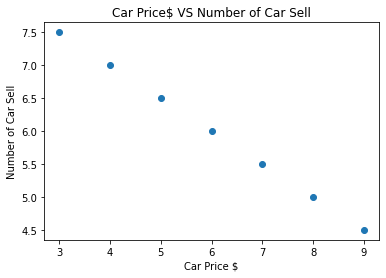

In [8]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [9]:
# libraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

epoch: 0, loss: 32.3225212097168
epoch: 50, loss: 5.532378673553467
epoch: 100, loss: 3.7384610176086426
epoch: 150, loss: 2.5262351036071777
epoch: 200, loss: 1.7070837020874023
epoch: 250, loss: 1.1535488367080688
epoch: 300, loss: 0.7795023322105408
epoch: 350, loss: 0.526742160320282
epoch: 400, loss: 0.35594186186790466
epoch: 450, loss: 0.24052490293979645
epoch: 500, loss: 0.16253283619880676
epoch: 550, loss: 0.10983026027679443
epoch: 600, loss: 0.0742173120379448
epoch: 650, loss: 0.05015125498175621
epoch: 700, loss: 0.03388941287994385
epoch: 750, loss: 0.02290072664618492
epoch: 800, loss: 0.015474833548069
epoch: 850, loss: 0.010457010008394718
epoch: 900, loss: 0.007066237274557352
epoch: 950, loss: 0.0047750272788107395
epoch: 1000, loss: 0.0032268145587295294


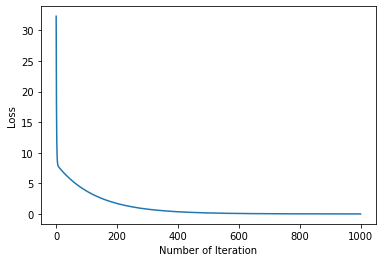

In [10]:
# create Linear Regression class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # accessing all things inherited from nn.Module
        super(LinearRegression,self).__init__()
        # linear function from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# Optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    # optimization
    optimizer.zero_grad()
    
    # forward to get output
    results = model(car_price_tensor)
    
    # calculate loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss for each 50 iterations
    if(iteration % 50 == 0):
        print("epoch: {}, loss: {}".format(iteration, loss.data))
        
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.show()

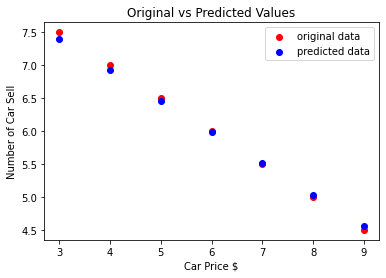

In [11]:
# predicted car prices
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = "original data", color = "red")
plt.scatter(car_prices_array, predicted, label = "predicted data", color = "blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted Values")
plt.show()